## Linear Regression Model

- It is the linear approach for modelling the relationship between one or more dependent and independent variables(features).
- It has applications that falls into one of the following two broad categories.
    1. If the goal is `prediction`, `forecasting` or `error-detection`.
    2. If the goal is to `analyse` or to explain `relationship/variation` between dependent and independent feattures. 
- <br><img src="s1.jpeg" width=150px height=150px align="left"><br><br><br><br><br><br><br><br><br><br><br> 
- In linear regression, the observations (`red`) are assumed to be the result of random deviations (`green`) from an underlying relationship (`blue`) between a `dependent` variable (`y`) and an `independent` variable (`x`).
- In other words, `red` are the actual value while its reflection marked in`green`on blue line is the predicted value.
- Thus, `e` i.e error variable is added in the equation.

### Equation
<br>
<img src="s2.jpeg" width=500px height=500px align="left">

- `y` is the `dependent` variable.
- `yhat` is the `predicted` value.
- `X` is the `n-dimensional Column Vector` known as `input` variable or `independent` variable.
- `B` is the intercept.
- Note: Xi0 = b0 = 1

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df = pd.read_csv('Balas Table.csv')

In [35]:
df.head()

,rem_lease,pct
0,1,3.8
1,2,7.5
2,3,10.9
3,4,14.1
4,5,17.1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rem_lease  101 non-null    int64  
 1   pct        101 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [37]:
df.describe()

,rem_lease,pct
count,101.000000,101.000000
mean,51.000000,69.130693
std,29.300171,24.061370
min,1.000000,3.800000
25%,26.000000,55.800000
50%,51.000000,75.200000
75%,76.000000,89.000000
max,101.000000,96.000000


In [38]:
df

,rem_lease,pct
0,1,3.8
1,2,7.5
2,3,10.9
3,4,14.1
4,5,17.1
...,...,...
96,97,95.8
97,98,95.9
98,99,96.0
99,100,96.0


In [39]:
df.head()

,rem_lease,pct
0,1,3.8
1,2,7.5
2,3,10.9
3,4,14.1
4,5,17.1


## Data Visualization

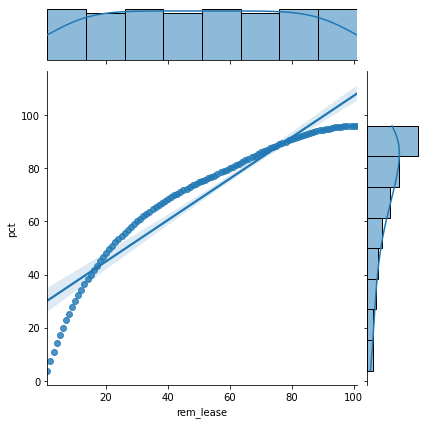

In [40]:
sns.jointplot(x=df['rem_lease'], y=df['pct'], data=df, kind='reg')

In [41]:
X = df['rem_lease']
Y = df['pct']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (80, 1)
Test - Predictors shape (21, 1)
Train - Target shape (80, 1)
Test - Target shape (21, 1)


In [43]:
# calculate co-efficient
def theta_calc(x_train, y_train): 
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)

    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)

    return theta

In [44]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [45]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [46]:
def rsq(prediction, y_test):

    total_data = len(prediction)
    
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

In [47]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)

Intercept of the model [30.14602817]
Slope of the model [0.76700837]


In [48]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

In [49]:
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.886455087289571


In [50]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['pct']
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)

Mean squared error of the model 75.73688730841396


In [51]:
error = (np.sum((prediction - y_test)**2))/len(prediction)
error

75.73688730841396

Text(0, 0.5, 'Residual')

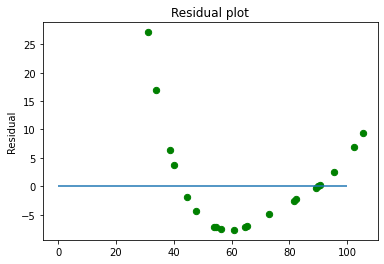

In [52]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [53]:
pred_df.head()

,pct
0,95.341740
1,73.098497
2,81.535589
3,82.302598
4,65.428413


In [54]:
y_test[1:6]

array([[77.9],
       [84.2],
       [84.5],
       [72.4],
       [68.5]])

### Using Scikit-Learn

In [55]:
cls = LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [56]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[0.76700837]]


In [57]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [30.14602817]


In [58]:
print('Mean Square Error', mean_squared_error(y_test, prediction))

Mean Square Error 75.73688730841396


In [59]:
print('Model R^2 Square value', r2_score(y_test, prediction))

Model R^2 Square value 0.886455087289571


Text(0.5, 1.0, 'Linear Regression')

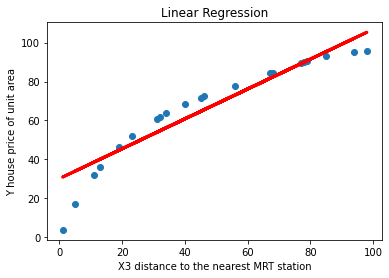

In [60]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

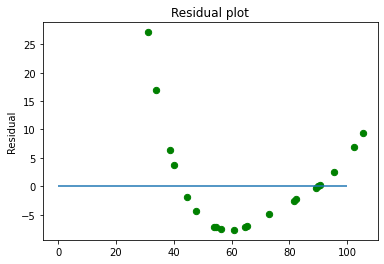

In [61]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')